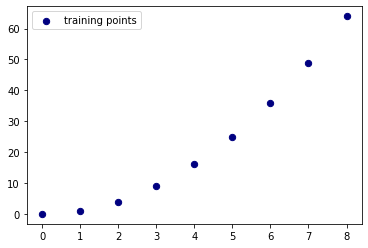

In [47]:
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución o el error #####
x= np.array([0,1,2,3,4,5,6,7,8])
y= np.array([0,1,4,9,16,25,36,49,64])
########################################
plt.scatter(x, y, color='navy', s=40, marker='o', label='training points')
plt.legend(loc='upper left')
plt.show()

In [51]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 2  ###############
pf = PolynomialFeatures(degree = 2) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(x.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2], b ==> b + Ax +Bx^2
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [0.00000000e+00 1.99840144e-15 1.00000000e+00], b = -3.552713678800501e-15


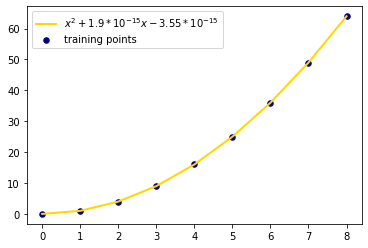

In [49]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
####### Genera los datos para la curva amarilla que se ajusta a los datos experimentales ############
prediccion_entrenamiento = regresion_lineal.predict(X)
############ Graficamos los datos experimentales ##########################################
plt.scatter(x, y, color='navy', s=30, marker='o', label='training points')
############ Graficamos los datos de entrenamiento (modelo ajustado, curva amarilla) ##########
plt.plot(x,prediccion_entrenamiento, color='gold', linewidth=2,
         label='$x^2+1.9*10^{-15}x-3.55*10^{-15}$')
######################### Agregamos y mostramos leyendas ##########################
plt.legend(loc='upper left')
plt.show()

In [37]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 1.7530242338244708e-30
Raíz del Error Cuadrático Medio (RMSE) = 1.3240182150652123e-15
Coeficiente de Determinación R2 = 1.0
